1103.9984 224.66327
436.50708 114.335556
465.32727 768.5894
1075.5115 658.0274


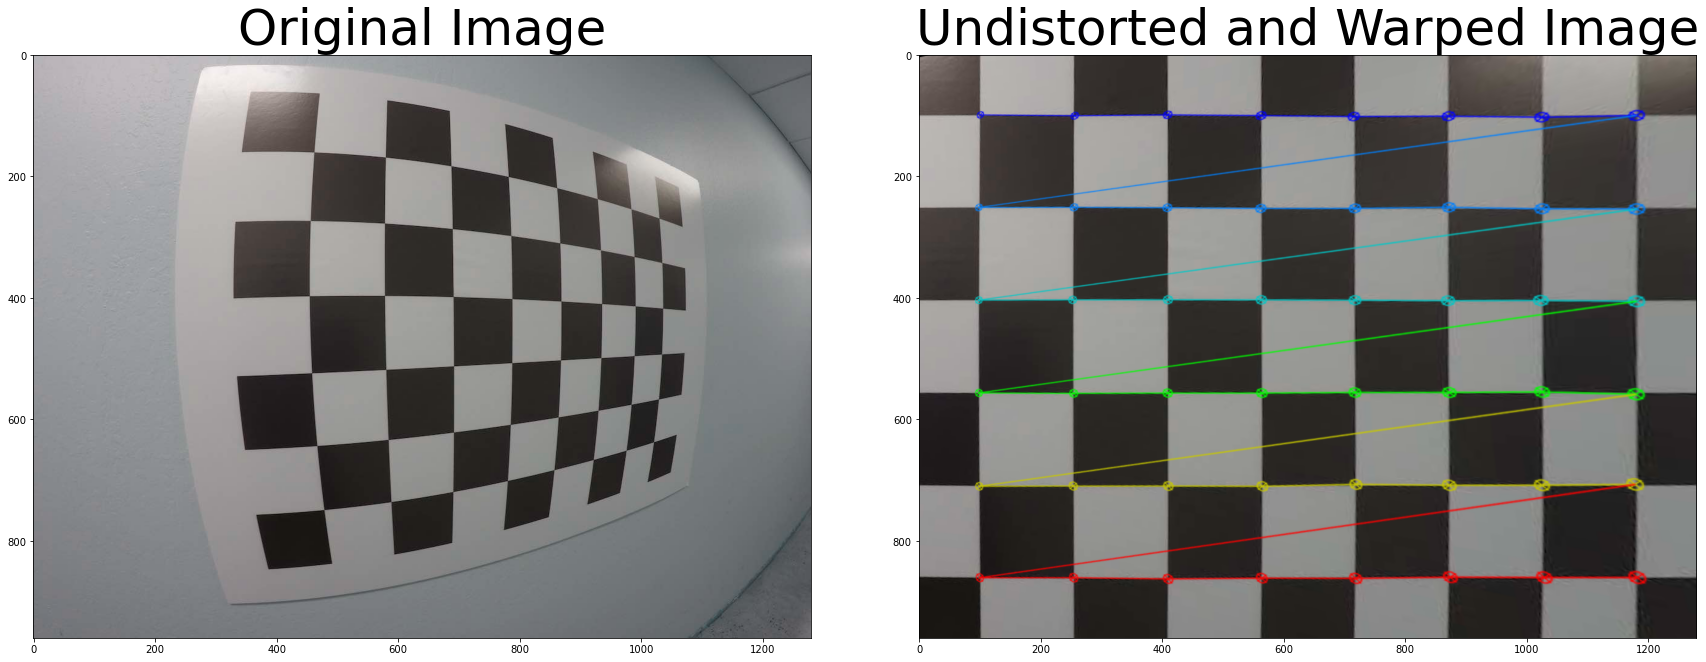

In [80]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    
    #undistorting image
    undistorted_image = cv2.undistort(img,mtx,dist,None,mtx)
    
    #converting to gray scale
    gray = cv2.cvtColor(undistorted_image,cv2.COLOR_BGR2GRAY)
    M=None
    
    #finding corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print(corners[7][0][0],corners[7][0][1])
    
    print(corners[0][0][0],corners[0][0][1])
    print(corners[40][0][0],corners[40][0][1])
    print(corners[47][0][0],corners[47][0][1])
    
    
    
    
    
    if ret==True:
        cv2.drawChessboardCorners(undistorted_image, (nx, ny), corners, ret)
        src=np.float32(
            [[corners[7][0][0],corners[7][0][1]],
            [corners[0][0][0],corners[0][0][1]],
            [corners[40][0][0],corners[40][0][1]],
            [corners[47][0][0],corners[47][0][1]]])
        dst=np.float32(
            [[1200,240],
            [150,250],
            [150,800],
            [1200,800]])    
 

        offset=100
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undistorted_image, M, (undistorted_image.shape[1],undistorted_image.shape[0]), flags=cv2.INTER_LINEAR)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
